# Apply Functions & Plotting Tutorial

* Visualizing Numerical Distributions
* Functions and Tables

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [1]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Working with Text using Functions


The following table contains the words from four chapters of Charles Dickens' [*A Tale of Two Cities*](http://www.gutenberg.org/cache/epub/98/pg98.txt).  We're going to compute some simple facts about each chapter.  Since we're performing the same computation on each chapter, it's best to encapsulate each computational procedure in a function, and then call the function several times. Run the cell to get a table with one column.

In [2]:
# Just run this cell to load the data.
tale_chapters = pd.read_csv("tale.csv")
tale_chapters

,Chapter text
0,"I. The Period\n\n\nIt was the best of times,\n..."
1,II. The Mail\n\n\nIt was the Dover road that l...
2,III. The Night Shadows\n\n\nA wonderful fact t...
3,IV. The Preparation\n\n\nWhen the mail got suc...


**Question 1.** Write a function called `word_count` that takes a single argument, the text of a single chapter, and returns the number of words in that chapter.  Assume that words are separated from each other by spaces. 

*Hint:* Try the string method [`split`](https://docs.python.org/3/library/stdtypes.html#str.split) and the function [`len`](https://docs.python.org/3/library/functions.html#len).

In [3]:
def word_count(x):
    ''' x = an individual string separatable with \n'''
    return(len(x.split()))

word_count(tale_chapters["Chapter text"][0])

1005

Your answer should look like a certain emergency call number

**Question 2.** Create an array called `chapter_lengths` which contains the length of each chapter in `tale_chapters`.

**Hint:** Consider using `apply` along with the function you have defined in the previous question.

In [4]:
chapter_lengths = tale_chapters['Chapter text'].apply(word_count)
chapter_lengths

0    1005
1    2016
2    1613
3    4382
Name: Chapter text, dtype: int64

**Question 3.** Write a function called `character_count`.  It should take a string as its argument and return the number of characters in that string that aren't spaces (" "), periods ("."), exclamation marks ("!"), or question marks ("?"). Remember that `tale_chapters` is a table, and that the function takes in only the text of one chapter as input.

*Hint:* Try using the string method `replace` several times to remove the characters we don't want to count.

In [5]:
def character_count(x):
    array = ' '.join(x.split()).replace("."," ").replace("!","").replace("?","").replace(" ","")
    return(len(array))
    
character_count(tale_chapters["Chapter text"][0])

4755

**Question 4.** Write a function called `chapter_number`.  It should take a single argument, the text of a chapter from our dataset, and return the number of that chapter, as a Roman numeral.  (For example, it should return the string "I" for the first chapter and "II" for the second.)  If the argument doesn't have a chapter number in the same place as the chapters in our dataset, `chapter_number` can return whatever you like.

To help you with this, we've included a function called `text_before`.  Its documentation describes what it does.

In [6]:
def text_before(full_text, pattern):
    """Finds all the text that occurs in full_text before the specified pattern.

    Parameters
    ----------
    full_text : str
        The text we want to search within.
    pattern : str
        The thing we want to search for.

    Returns
    -------
    str
        All the text that occurs in full_text before pattern.  If pattern
        doesn't appear anywhere, all of full_text is returned.
    
    Examples
    --------
    
    >>> text_before("The rain in Spain falls mainly on the plain.", "Spain")
    'The rain in '
    >>> text_before("The rain in Spain falls mainly on the plain.", "ain")
    'The r'
    >>> text_before("The rain in Spain falls mainly on the plain.", "Portugal")
    'The rain in Spain falls mainly on the plain.'
    """
    return np.array(full_text.split(pattern))[0]

def chapter_number(chapter_text):
    ''' returns the chapter number of our text with a roman numeral '''
    roman = text_before(chapter_text, ".")
    return(roman)

Test your code using the following function call (just run the code in the next cell): 

In [7]:
chapter_number(tale_chapters["Chapter text"][3])

'IV'

## 2. Uber


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` table contains the length of the ride, in minutes.

In [8]:
boston = pd.read_csv("boston.csv")
manila = pd.read_csv("manila.csv")
print("Boston Table")
boston.head(4)

Boston Table


,sourceid,dstid,hod,ride time
0,584,33,7,11.866000
1,1013,1116,13,17.799333
2,884,1190,22,19.348833
3,211,364,1,1.723500


In [9]:
print("Manila Table")
manila.head(4)

Manila Table


,sourceid,dstid,hod,ride time
0,544,5,22,22.811500
1,302,240,21,7.022667
2,278,99,16,21.643667
3,720,775,18,13.059667


**Question 1.**
Produce histograms of all ride times in Boston and in Manila, using the given bins. Please put the code for both of them in the following cell, and put the ride times for Boston first.  

<AxesSubplot:title={'center':'Manila'}, ylabel='Frequency'>

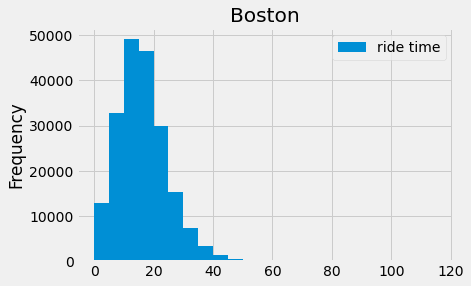

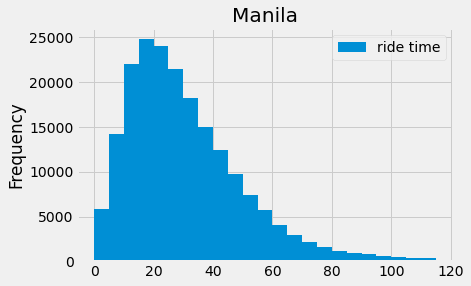

In [10]:
bins = np.arange(0, 120, 5)
boston.plot(kind = 'hist', bins = bins, y = 'ride time', title = 'Boston')
manila.plot(kind = 'hist', bins = bins, y = 'ride time', title = 'Manila')

**Question 2.** Set the two variables below to estimates of what percentage of rides are less than 10 minutes in Boston and Manila. Find your estimates by visually assessing the histograms. Your solution should consist of only mathematical operations and numbers.

In [11]:
# Using visual assesments of the histogram and nothing else
boston_under_10 = round((32000+12000)/(12000+32000+49500+48000+30000+15000+8000+3000+1000+100),5)
manila_under_10 = round((6000+14500)/(6000+14500+22500+25000+24000+21500+17500+15000+12500+
                                 10000+7500+6000+4000+2500+2000+1500+1000+1000+500*3),5)

# Using the dataframes provided to us
boston_under_10_df = len(boston['ride time'][boston['ride time']<10])/len(boston['ride time'])
manila_under_10_df = len(manila['ride time'][manila['ride time']<10])/len(manila['ride time'])

In [12]:
print('---------Boston under 10---------')
print('Measuring by eye: '+str(boston_under_10))
print('Measuring using the dataframe: ',boston_under_10_df)
print('')
print('---------Manila under 10---------')
print('Measuring by eye: '+str(manila_under_10))
print('Measuring using the dataframe: ',manila_under_10_df)

---------Boston under 10---------
Measuring by eye: 0.22155
Measuring using the dataframe:  0.22829

---------Manila under 10---------
Measuring by eye: 0.10486
Measuring using the dataframe:  0.10039


**Question 3.** Comment on the main difference between the two histograms. What might be causing this?

**Your Answer Here**: This could be caused by how the traffic layout works in either city, Boston could have less dense traffic than Manila. This could also be caused by how far each commuter want to travel in each city, Boston commuters may want to get to a closer location than a Manila commuter. In all likelyhood, it is probably a combination of these scenarios along with other parameters like the population of the cities, how public transport is organized in each city, the *physical* size of the cities, and much more.

**Question 4.** The `hod` column in each table represents the hour of the day during which the Uber was called. 0 corresponds to 12-1 AM, 1 to 1-2 AM, 13 to 1-2 PM, etc. Write a function which takes in a table like `boston` or `manila`, and an `hod` number between 0 and 23, and displays a histogram of ride lengths from that hour in that city. Use the same bins as before.

<AxesSubplot:title={'center':'Travel time at hod 12'}, ylabel='Frequency'>

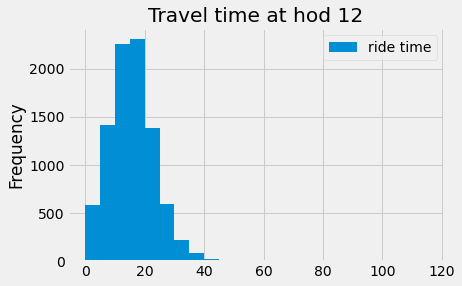

In [13]:
def hist_for_time(tbl, hod):
    bins = np.arange(0, 120, 5)
    true = tbl['hod']==hod
    table = tbl[true].plot(kind='hist',bins=bins,y='ride time',title = 'Travel time at hod '+str(hod))
    return(table)


#DO NOT DELETE THIS LINE! 
hist_for_time(boston, 12)

**Optional Question 5.** Which city has a larger difference between Uber ride times at 10 AM vs. 10 PM? In other words, which is larger: the difference between 10 AM and 10 PM Uber ride times in Manila or the difference between 10 AM and 10 PM uber ride times in Boston. Use the function you just created to answer this question. You do not need to calculate an actual difference.

Assign `larger_diff` to the number 1 if the answer is Manila, and 2 if the answer is Boston. 

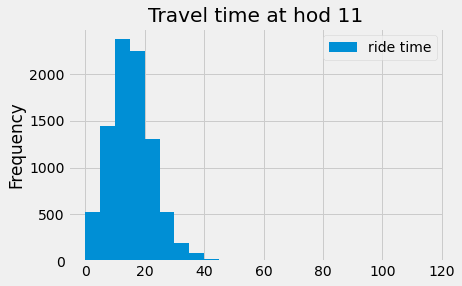

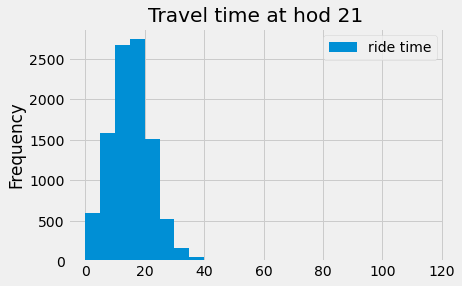

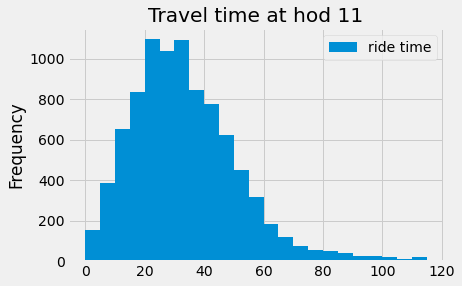

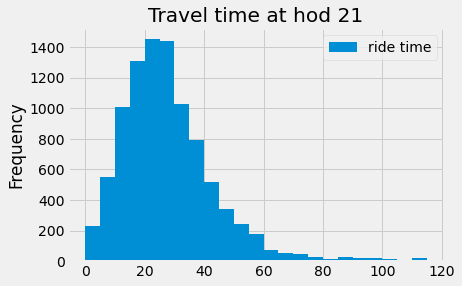

In [14]:
hist_for_time(boston,11)
hist_for_time(boston,21)
hist_for_time(manila,11)
hist_for_time(manila,21)

larger_diff = 1    # Manila has a larger difference (examining by eye)

## 3.  Diamond

In this section, you can use matplotlib function or pandas function to draw graphs.

**Question 1.** Import the "diamonds.csv".

In [15]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The meaning of each variable is as follows：

* Carat : Carat weight of the Diamond.
* Cut : Describe cut quality of the diamond.
    * Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
* Color : Color of the Diamond.
    * With D being the best and J the worst.
* Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
    * (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
* Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
* Price : the Price of the Diamond.
* X : Length of the Diamond in mm.
* Y : Width of the Diamond in mm.
* Z : Height of the Diamond in mm.

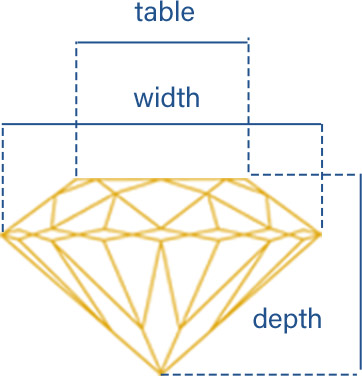

In [16]:
import IPython.display
IPython.display.Image('https://dko1uqom4qru1.cloudfront.net/images/diamond-education/depth_table.jpg')

**Question 2.** Draw a histogram plot for "carat" variable.

<AxesSubplot:ylabel='Frequency'>

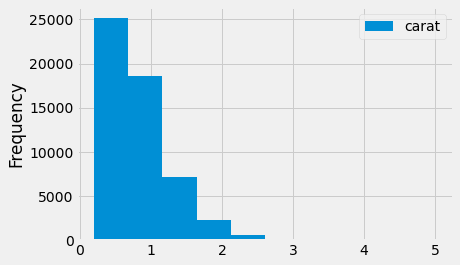

In [17]:
diamonds.plot(kind='hist', y='carat')

**Question 3.** Draw a scatter plot to show the price changes with the carat weight.

<AxesSubplot:xlabel='carat', ylabel='price'>

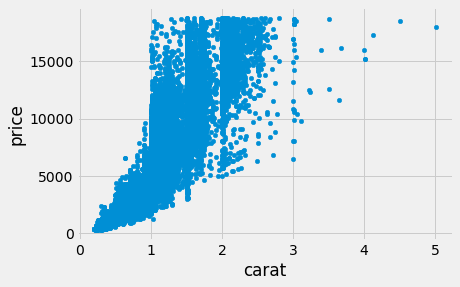

In [18]:
diamonds.plot(kind='scatter', x='carat', y ='price')

**Question 4.** Discover how average price changes with "cut" and use a bar plot to show that. 

<BarContainer object of 5 artists>

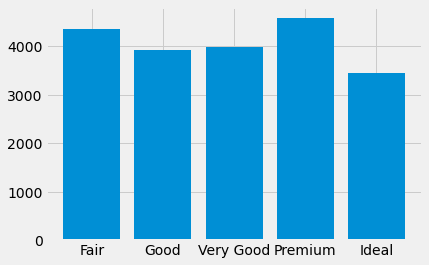

In [19]:
import matplotlib.pyplot as plt
fair_diamonds = diamonds[diamonds["cut"] == "Fair"]
fair_price = np.average(fair_diamonds["price"])

good_diamonds = diamonds[diamonds["cut"] == "Good"]
good_price = np.average(good_diamonds["price"])

very_good_diamonds = diamonds[diamonds["cut"] == "Very Good"]
very_good_price = np.average(very_good_diamonds["price"])

premium_diamonds = diamonds[diamonds["cut"] == "Premium"]
premium_price = np.average(premium_diamonds["price"])

ideal_diamonds = diamonds[diamonds["cut"] == "Ideal"]
ideal_price = np.average(ideal_diamonds["price"])


cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
ave_prices = [fair_price, good_price, very_good_price, premium_price, ideal_price]
plt.bar(cut_levels,ave_prices)

**Question 5.** Use a pie plot to show the distribution of "cut" levels. In Pie chart display the percentage of each "cut" level.

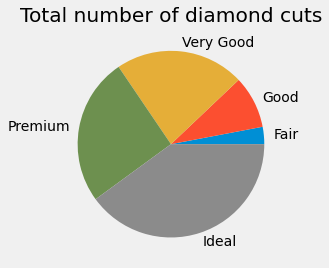

In [20]:
fair_total = len(fair_diamonds)
good_total = len(good_diamonds)
very_good_total = len(very_good_diamonds)
premium_total = len(premium_diamonds)
ideal_total = len(ideal_diamonds)

cut_total = [fair_total, good_total, very_good_total, premium_total, ideal_total]

plt.title('Total number of diamond cuts')
plt.pie(cut_total, labels = cut_levels)
plt.show()